# Project on Face Recognition in Videos

<B><U>Solution:-</U></B>
1. Create a model to vectorize Human faces.
2. Create a DB with the Vector representations.
3. Take a photo and identify faces.
4. Crop the face section and generate the vector from the built model.
5. Lookup in the DB using some form of 'closeness' and predict the Face ID.
6. Perform Step 5 for live Videos/Webcam.

<B><U>Steps Followed:-</U></B>
- A prebuilt model in 'face_recognition' library has been used in this case. Function 'face_encodings' accomplishes this task.
- For the known people, I've saved the encodings and the corresponding Name labels in two arrays in the same order.
- This is accomplished by updating the 'known' folder with new photos and filenames as name labels.
- The Face section is extracted using the 'face_locations' function and the encodings from 'face_encodings'.
- An input image/Frame (for Video Streaming) is processed to extract the closest matching face encoding of a known person and is labeled on the identified Bounding Box.

In [1]:
import cv2
from PIL import Image, ImageDraw, ImageFont
import dlib

import face_recognition
from imutils import face_utils

import os
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
if os.path.exists('encodings_db'):
    encodings_db = pickle.load(open('encodings_db', 'rb'))
else:
    encodings_db = []
    
if os.path.exists('labels_db'):
    labels_db = pickle.load(open('labels_db', 'rb'))
else:
    labels_db = []

In [3]:
images = os.listdir('./data/known/')

for image in images:
    label_name = image.split('.')[0]
    # Add new labels only
    if label_name in labels_db:
        continue
    img = face_recognition.load_image_file(f'./data/known/{image}')
    encodings = face_recognition.face_encodings(img)[0]
    encodings_db.append(encodings)
    labels_db.append(label_name)
    print(f'Label "{label_name}" added...')
# [print(i,j) for (i,j) in zip(labels_db, encodings_db)];

Label "Ajinkya_Rahane" added...
Label "Ashwin" added...
Label "Bhuvneshwar_Kumar" added...
Label "George_Clooney" added...
Label "Hardik_Pandya" added...
Label "Jasprit_Bumrah" added...
Label "Johnny_Galecki" added...
Label "John_Doe" added...
Label "John_Doe_2" added...
Label "Kedar_Jadhav" added...
Label "Manish_Pandey" added...
Label "Melissa_Rauch" added...
Label "Mohammed_Shami" added...
Label "MS_Dhoni" added...
Label "Ravindra_Jadeja" added...
Label "Rohit_Sharma" added...
Label "Shikhar_Dhawan" added...


C:\Users\Jeet\Anaconda3\envs\virtual_env\lib\site-packages\PIL\Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


Label "Umesh_Yadav" added...
Label "Virat_Kohli" added...
Label "Yuvraj_Singh" added...


In [4]:
pickle.dump(encodings_db, open('encodings_db', 'wb'))
pickle.dump(labels_db, open('labels_db', 'wb'))

In [5]:
# [print(i) for i in os.listdir('./data/known/')];

In [6]:
# --> Match by face_compare()
# img = face_recognition.load_image_file('Indian_Cricket_Teamjpg.jpg')
# locs = face_recognition.face_locations(img, model='cnn')
# encodings = face_recognition.face_encodings(img, locs)

# i = 1
# for (top, right, bottom, left) in locs:
#     print(f'Face# {i} Location: ({top}, {right}, {bottom}, {left})')
#     i += 1
#     face = img[top:bottom, left:right]
#     plt.imshow(face)
#     plt.show()

Hardik_Pandya Location: (307, 332, 354, 284)


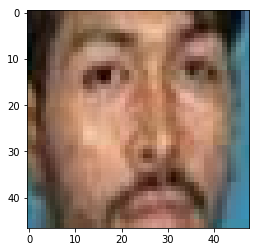

Rohit_Sharma Location: (27, 410, 84, 353)


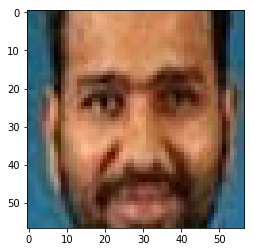

Jasprit_Bumrah Location: (569, 404, 626, 347)


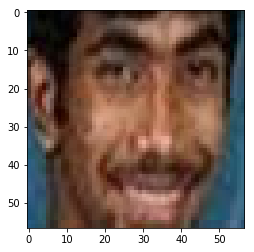

Mohammed_Shami Location: (315, 813, 372, 756)


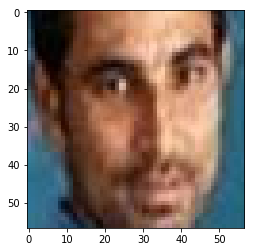

Kedar_Jadhav Location: (302, 154, 349, 107)


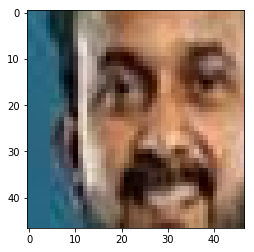

Manish_Pandey Location: (563, 237, 620, 180)


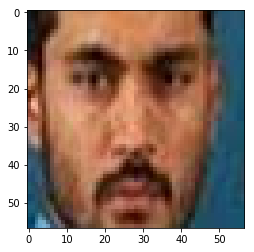

Ajinkya_Rahane Location: (38, 562, 86, 515)


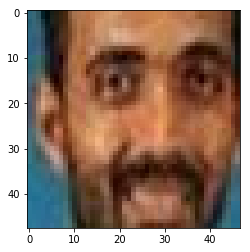

Yuvraj_Singh Location: (45, 871, 101, 814)


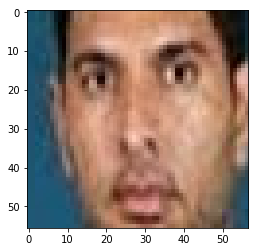

Bhuvneshwar_Kumar Location: (566, 711, 614, 663)


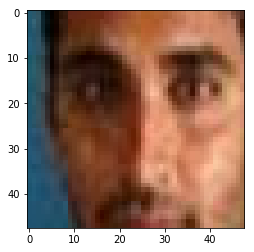

Virat_Kohli Location: (97, 1181, 195, 1083)


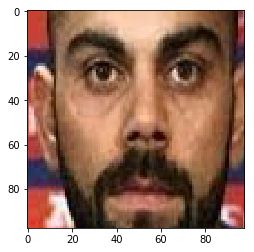

Shikhar_Dhawan Location: (33, 260, 81, 212)


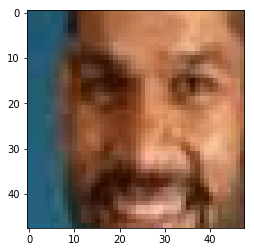

Virat_Kohli Location: (38, 96, 86, 49)


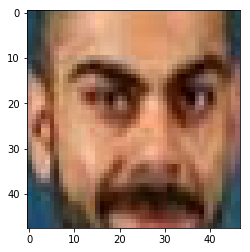

Ashwin Location: (304, 496, 361, 439)


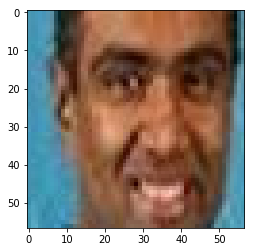

Ravindra_Jadeja Location: (316, 653, 364, 606)


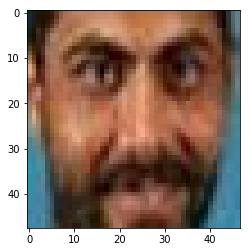

Umesh_Yadav Location: (557, 548, 614, 491)


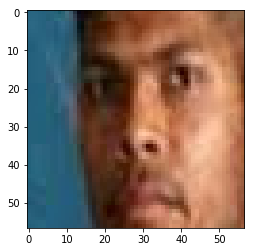

MS_Dhoni Location: (33, 732, 90, 676)


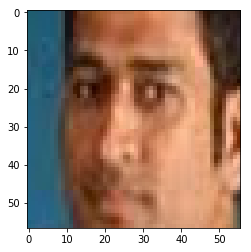

In [7]:
# --> Match by Closest Distance between the face encodings
TOLERANCE = 0.55

img = face_recognition.load_image_file('../Indian_Cricket_Team_1.jpg')
locs = face_recognition.face_locations(img, model='cnn')
encodings = face_recognition.face_encodings(img, locs)

for i, (top, right, bottom, left) in enumerate(locs):
    face = img[top:bottom, left:right]
    dist = face_recognition.face_distance(encodings_db, encodings[i])
    closest = np.min(dist)
    closest_index = np.argmin(dist)
    
    if closest <= TOLERANCE:
        label = labels_db[closest_index]
    else:
        label = "Unknown"
    
    print(f'{label} Location: ({top}, {right}, {bottom}, {left})')
    plt.imshow(face)
    plt.show()
    plt.close()

In [8]:
def get_image_recognition(test_image, TOLERANCE = 0.55, font_size = 15, model='cnn', video_stream=False):
    
    # If a Video Stream is used then take the input Image Frame
    if video_stream:
        img = test_image
    else:
        img = face_recognition.load_image_file(test_image)
    # Extract the Face Locations
    locs = face_recognition.face_locations(img, model=model)
    # Extract the 128-dim Face Encodings
    encodings = face_recognition.face_encodings(img, locs)
    
    # Convert the image to a PIL format and draw the label on it
    pil_image = Image.fromarray(img)
    draw = ImageDraw.Draw(pil_image)
    font = ImageFont.truetype("arial.ttf", font_size)

    for i, (top, right, bottom, left) in enumerate(locs):
        face = img[top:bottom, left:right]
        dist = face_recognition.face_distance(encodings_db, encodings[i])
        closest = np.min(dist)
        closest_index = np.argmin(dist)

        if closest <= TOLERANCE:
            label = labels_db[closest_index]
        else:
            label = "Unknown"

        draw.rectangle(((left, top), (right, bottom)), outline=(255,255,0))
        text_width, text_height = draw.textsize(label)
        draw.text((left + 2, top - text_height - 10), label, fill='yellow', font=font)

    return pil_image

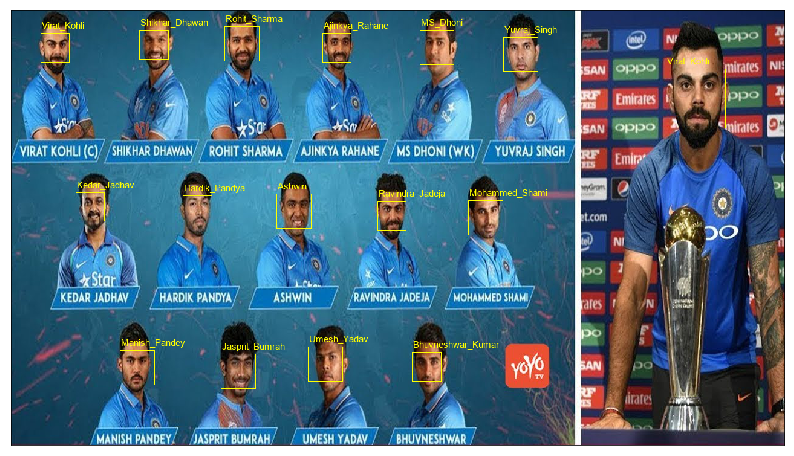

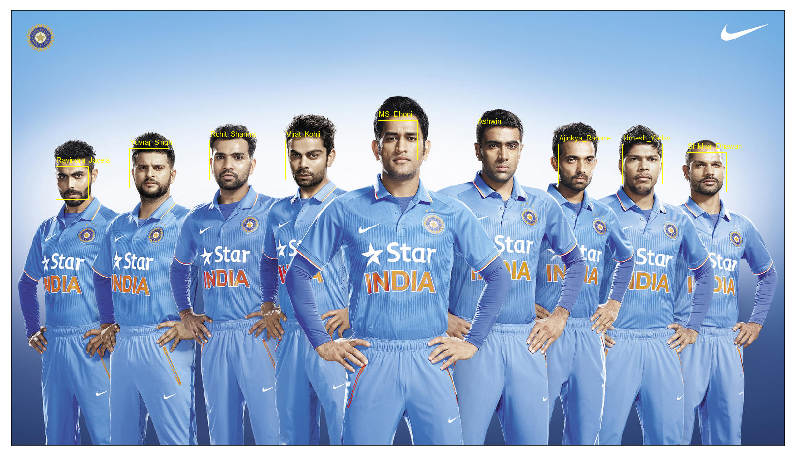

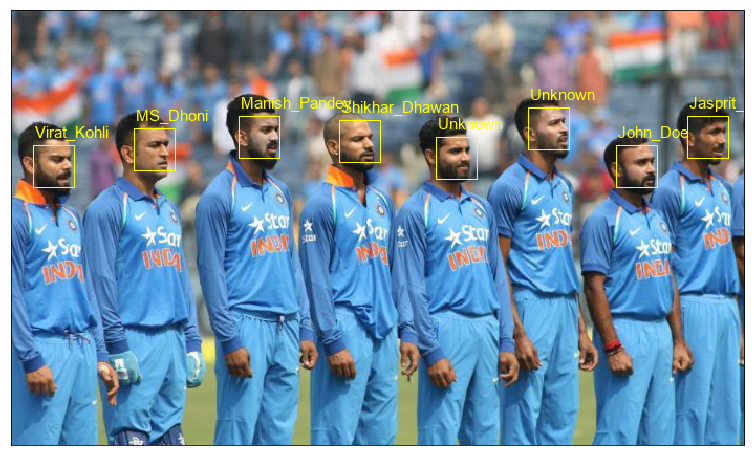

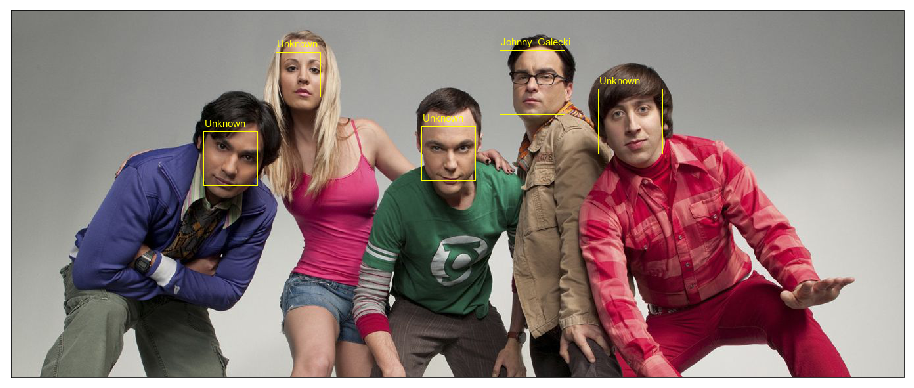

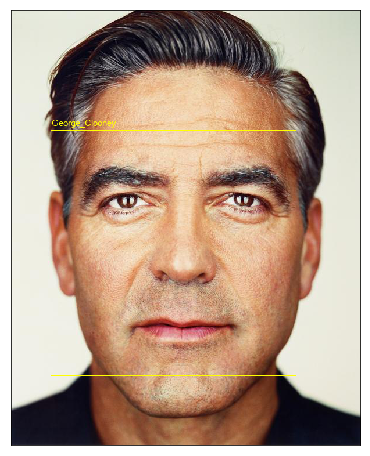

In [9]:
test_image_list = ['../Indian_Cricket_Team_1.jpg', '../Indian_Cricket_Team_2.jpg', '../Indian_Cricket_Team_3.jpg',
                  '../BigBangTheory_1692x695.jpg', '../george_small.jpg']

for image in test_image_list:
    recog_image = get_image_recognition(image)
    plt.figure(figsize=(16,8))
    plt.imshow(recog_image)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [10]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    recog_frame = get_image_recognition(frame, model='hog', video_stream=True)

    cv2.imshow('Face Recognition', np.array(recog_frame))    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Conclusion:
- The inbuilt models mislabelled on couple of images. This might be due to the fact that only 1 image/label has been used to get the predicted encodings. Instead, the inbuilt models need to be modified with images of a new label. This should improve the face recognition considerably.